In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import panel as pn
import param
pn.extension()

In [2]:
def rank_plot(ds,v,exp,nx,ax=None):
    
    if not ax:
        fig=plt.figure()
        ax=fig.add_subplot()
        

    da=abs(ds[v].sel(exp=exp,ens='max')-ds[v].sel(exp=exp,ens='min'))
    ix=da.argsort().values[-nx:]

    ax.plot(ds[v].sel(exp=exp,param='default'),[0,nx-1],'k:',label='default')
    ax.scatter(ds[v].sel(exp=exp,ens='min').isel(param=ix),range(nx),marker='o',facecolors='none', edgecolors='r',label='min')
    ax.plot(   ds[v].sel(exp=exp,ens='max').isel(param=ix),range(nx),'ro',label='max')

    for i,j in enumerate(ix):
        xmin,xmax=ds[v].sel(exp=exp).isel(param=j)
        ax.plot([xmin,xmax],[i,i],'r')
    ax.set_yticks(range(nx))
    ax.set_yticklabels([p[:15] for p in ds.param[ix].values]);
    ax.set_xlabel(v +' ['+ds[v].units+']')
    ax.set_title(exp)

In [13]:
def twoplots(ds,v1,v2,e1,e2):
    fig=plt.Figure(figsize=[9,5])
    ax=fig.add_subplot(121)
    rank_plot(ds,v1,e1,8,ax=ax)
    ax.legend()
    ax=fig.add_subplot(122)
    rank_plot(ds,v2,e2,8,ax=ax)
    fig.subplots_adjust(left=0.2,wspace=0.6)
    
    return fig

In [14]:
ds=xr.open_dataset('ppe_viz.nc')
class Selections(param.Parameterized):
    
    dvs=[v for v in ds.data_vars]
    exps=list(ds.exp.values)
    
    v1   = param.Selector(objects=dvs)
    exp1 = param.Selector(objects=exps)
    v2   = param.Selector(objects=dvs)
    exp2 = param.Selector(objects=exps)


    def view(self):
        return twoplots(ds,self.v1,self.v2,self.exp1,self.exp2)


Row
    [0] ParamMethod(method)
    [1] Column(margin=5, name='Selections', width=300)
        [0] StaticText(value='<b>Selections</b>')
        [1] Select(name='V1', options=OrderedDict([('GPP', ...]), value='GPP')
        [2] Select(name='Exp1', options=OrderedDict([('CTL2010', ...]), value='CTL2010')
        [3] Select(name='V2', options=OrderedDict([('GPP', ...]), value='GPP')
        [4] Select(name='Exp2', options=OrderedDict([('CTL2010', ...]), value='CTL2010')
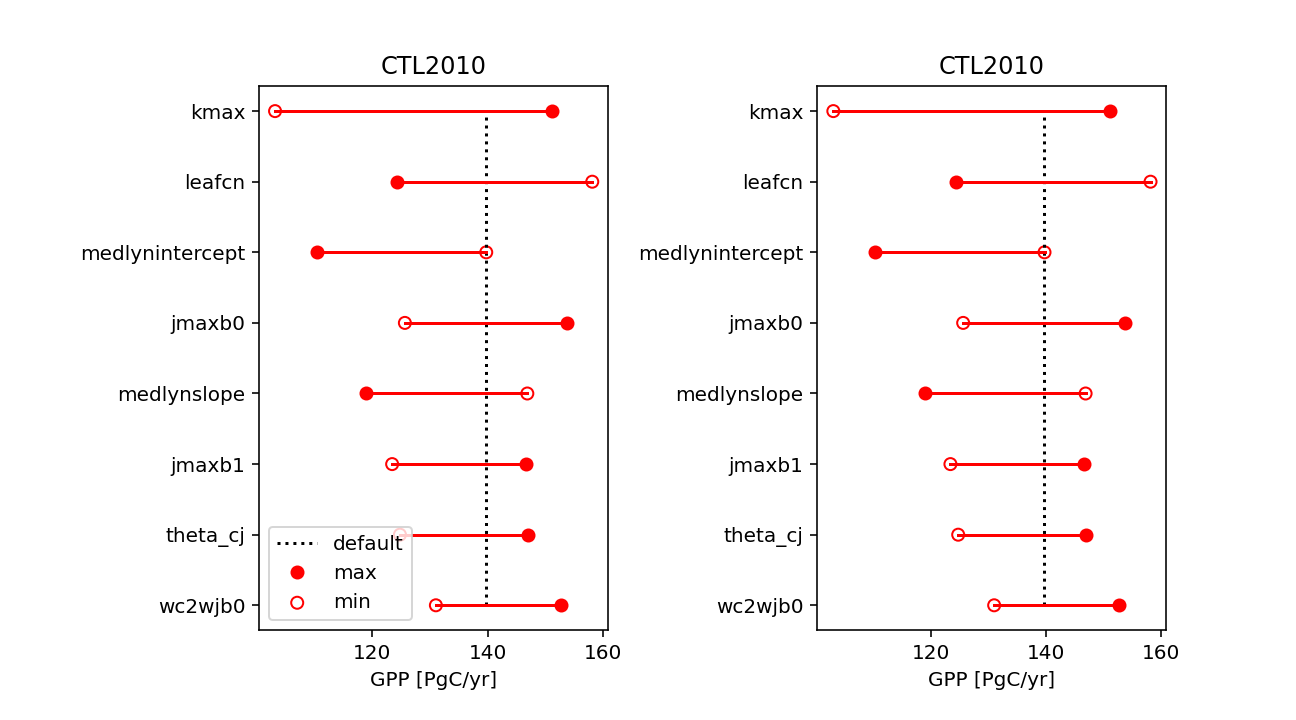

In [15]:
obj = Selections()
pn.Row(obj.view,obj.param)